In [20]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
df1 = pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')
df2 = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df3 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-march-2012-onwards.csv')

frames = [df1, df2, df3]

df = pd.concat(frames)

In [55]:
#some data cleansing
df = (df.apply(lambda x: x.astype(str).str.lower()) #change everything to lowercase
      .rename(columns={'month': 'date',
                       'flat_type': 'type',
                       'street_name': 'street',
                       'storey_range': 'storey',
                       'floor_area_sqm': 'area',
                       'flat_model': 'model',
                       'lease_commence_date': 'lease_start'}))

df['date'] = pd.to_datetime(df['date'])
df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month

In [227]:
df['area'] = pd.to_numeric(df['area'])
df['resale_price'] = pd.to_numeric(df['resale_price'])
df['type'] = df['type'].replace({'multi-generation': 'multi generation'})
df['price_sqm'] = df['resale_price'] / df['area']

df.head()

,date,town,type,block,street,storey,area,model,lease_start,resale_price,year,month,region,price_psm,price_sqm
0,1990-01-01,ang mo kio,1 room,309,ang mo kio ave 1,10 to 12,31.0,improved,1977,9000.0,1990,1,north east,290.322581,290.322581
1,1990-01-01,ang mo kio,1 room,309,ang mo kio ave 1,04 to 06,31.0,improved,1977,6000.0,1990,1,north east,193.548387,193.548387
2,1990-01-01,ang mo kio,1 room,309,ang mo kio ave 1,10 to 12,31.0,improved,1977,8000.0,1990,1,north east,258.064516,258.064516
3,1990-01-01,ang mo kio,1 room,309,ang mo kio ave 1,07 to 09,31.0,improved,1977,6000.0,1990,1,north east,193.548387,193.548387
4,1990-01-01,ang mo kio,3 room,216,ang mo kio ave 1,04 to 06,73.0,new generation,1976,47200.0,1990,1,north east,646.575342,646.575342


In [59]:
plt.style.use('seaborn-white')
mpl.rc('figure', figsize = (12,5))
mpl.rc('axes', facecolor = 'white', grid = True)
mpl.rc('axes.spines', top = False, right = False)
mpl.rc('grid', color = 'k', linestyle = ':', linewidth = 0.5)
mpl.rc('font', family = 'monospace') 
#mpl.rc('font', serif = 'Droid Serif')
#mpl.rc('')
#mpl.rc('axes', facecolor = 'white')
#mpl.rc('grid', color = 'grey', linestyle = ':', linewidth = 1.0)
#mpl.rc('axes', facecolor = 'white')
#mpl.rc('axes', which = 'y')
#mpl.rc('grid', which = 'y')
#mpl.rcParams['axes.grid.axis'] = 'x'
#mpl.rcParams['grid.color'] = 'k'
#mpl.rcParams['grid.linestyle'] = ':'
#mpl.rcParams['grid.linewidth'] = 1.0
#mpl.rcParams['axes.facecolor'] = 'white'
#mpl.rcdefaults()

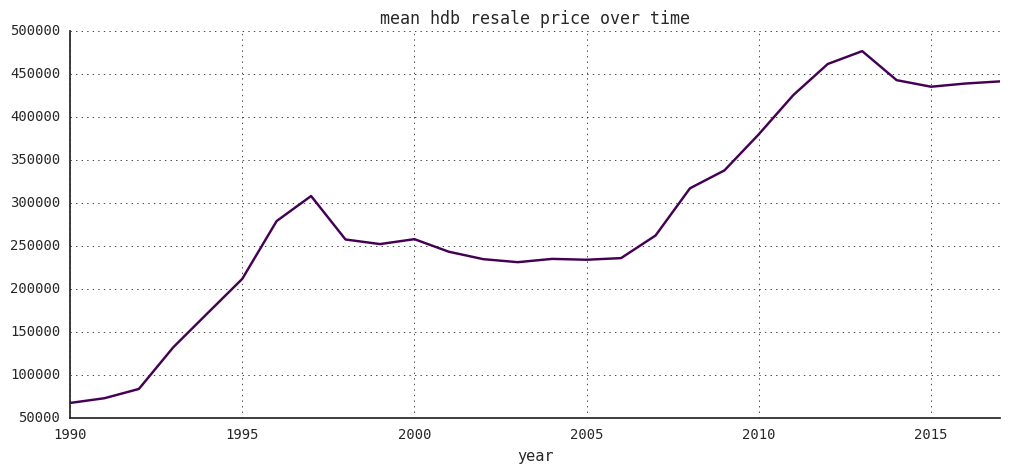

In [60]:
#mean resale price over time
mean_price = df.groupby('year')['resale_price'].mean()

ax = mean_price.plot(kind = 'line', colormap = 'viridis', title = 'mean hdb resale price over time')

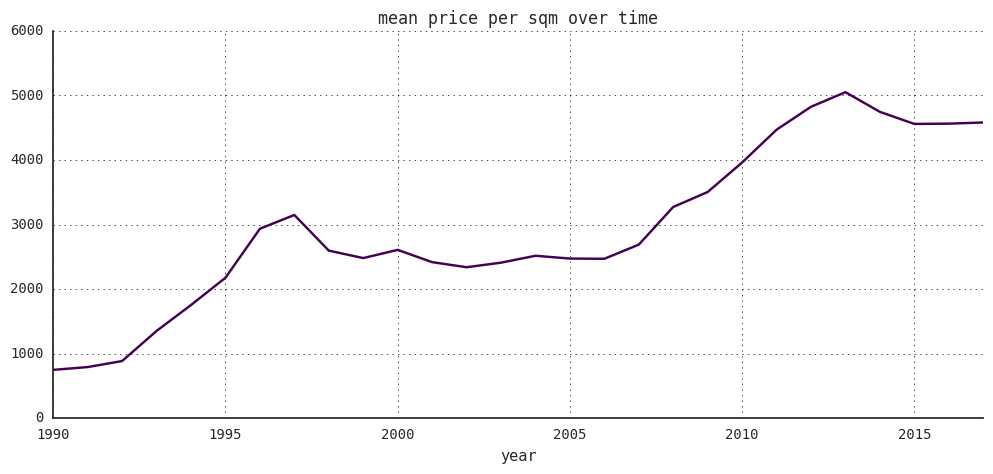

In [228]:
#mean resale price over time
mean_price = df.groupby('year')['price_psm'].mean()

ax = mean_price.plot(kind = 'line', colormap = 'viridis', title = 'mean price per sqm over time')

In [61]:
df['town'].unique()

array(['ang mo kio', 'bedok', 'bishan', 'bukit batok', 'bukit merah',
       'bukit timah', 'central area', 'choa chu kang', 'clementi',
       'geylang', 'hougang', 'jurong east', 'jurong west',
       'kallang/whampoa', 'marine parade', 'queenstown', 'sengkang',
       'serangoon', 'tampines', 'toa payoh', 'woodlands', 'yishun',
       'lim chu kang', 'sembawang', 'bukit panjang', 'pasir ris', 'punggol'], dtype=object)

In [62]:
def fsub(x):
    if x in ['sembawang', 'woodlands', 'yishun', 'lim chu kang']:
        return 'north'
    if x in ['ang mo kio', 'hougang', 'punggol', 'sengkang', 'serangoon']:
        return 'north east'
    if x in ['bedok', 'tampines', 'pasir ris']:
        return 'east'
    if x in ['bukit batok', 'bukit panjang', 'choa chu kang', 'clementi', 'jurong east', 'jurong west']:
        return 'west'
    if x in ['bishan', 'bukit merah', 'bukit timah', 'central area', 'geylang', 'kallang/whampoa', 'marine parade', 'queenstown', 'toa payoh']:
        return 'central'
    return 'others'

In [63]:
df = df.assign(region = lambda x: x['town'].apply(fsub))

df['region'].unique()

array(['north east', 'east', 'central', 'west', 'north'], dtype=object)

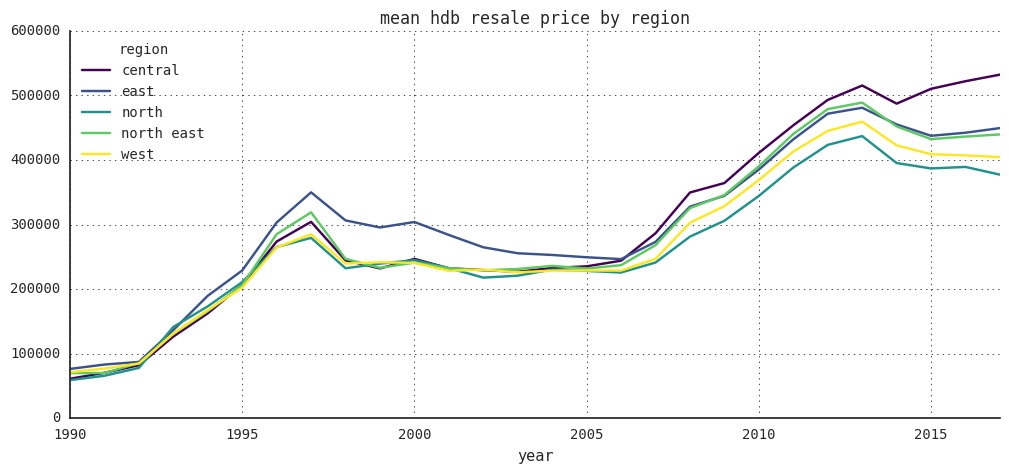

In [64]:
#mean resale price by region
ax = (df.pivot_table(values = 'resale_price', index = 'year', columns = 'region', aggfunc = np.mean)
     .plot(figsize = (12,5), kind = 'line', colormap = 'viridis', title = 'mean hdb resale price by region'))

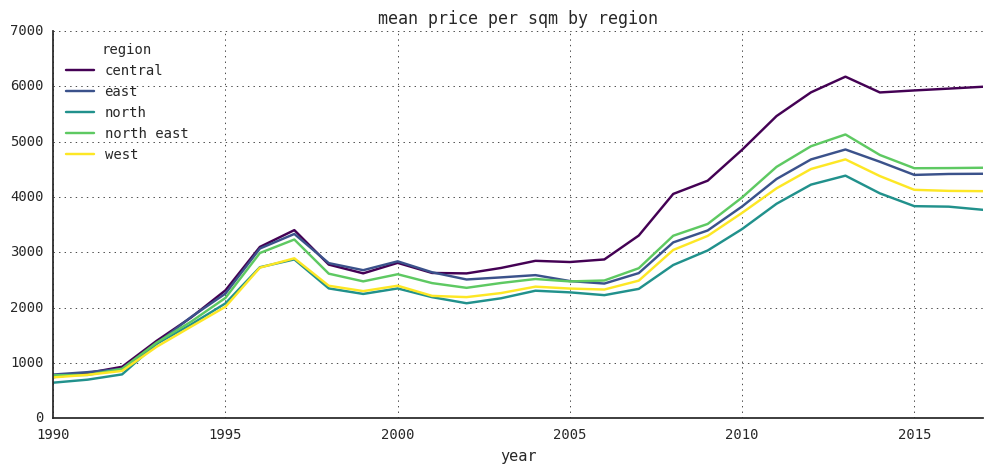

In [230]:
#mean resale price by region
ax = (df.pivot_table(values = 'price_sqm', index = 'year', columns = 'region', aggfunc = np.mean)
     .plot(figsize = (12,5), kind = 'line', colormap = 'viridis', title = 'mean price per sqm by region'))

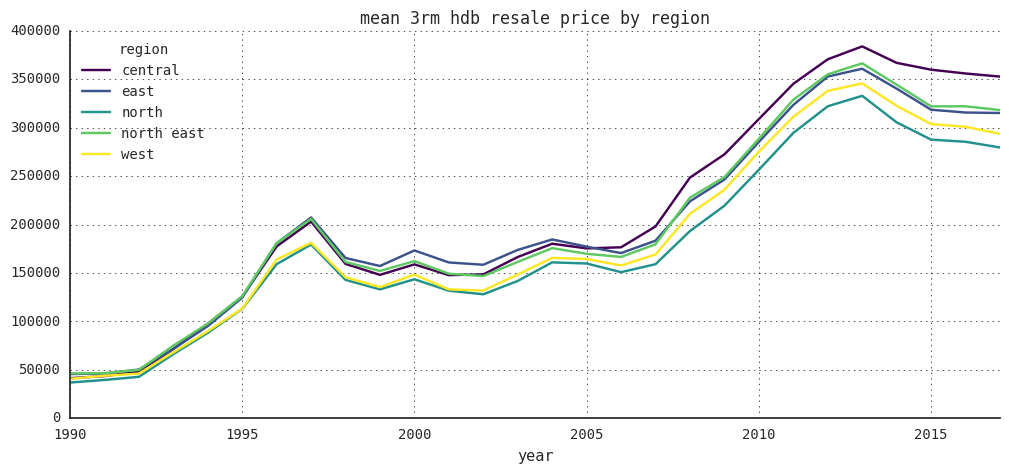

In [65]:
#mean 3 room hdb price by region
ax = (df.query('type == "3 room"')
      .pivot_table(values = 'resale_price', index = 'year', columns = 'region', aggfunc = np.mean)
      .plot(figsize = (12,5), kind = 'line', colormap = 'viridis', title = 'mean 3rm hdb resale price by region'))

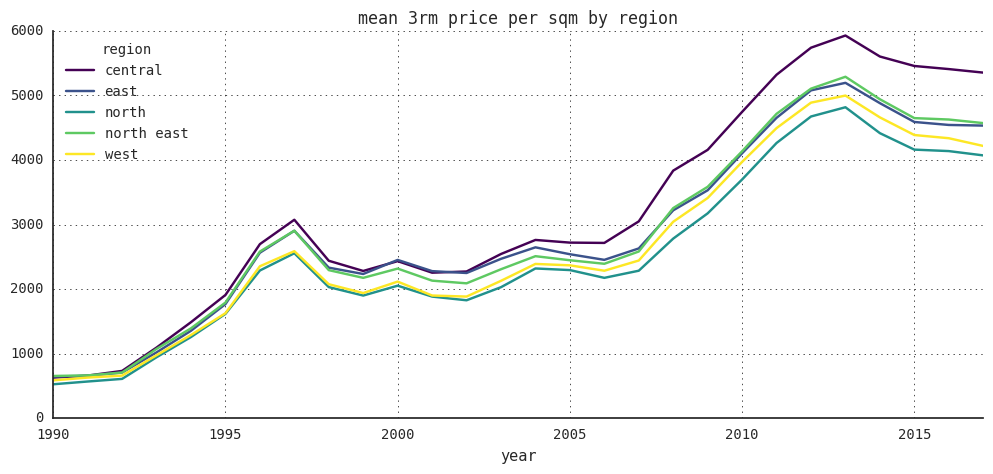

In [231]:
#mean 3 room hdb price by region
ax = (df.query('type == "3 room"')
      .pivot_table(values = 'price_sqm', index = 'year', columns = 'region', aggfunc = np.mean)
      .plot(figsize = (12,5), kind = 'line', colormap = 'viridis', title = 'mean 3rm price per sqm by region'))

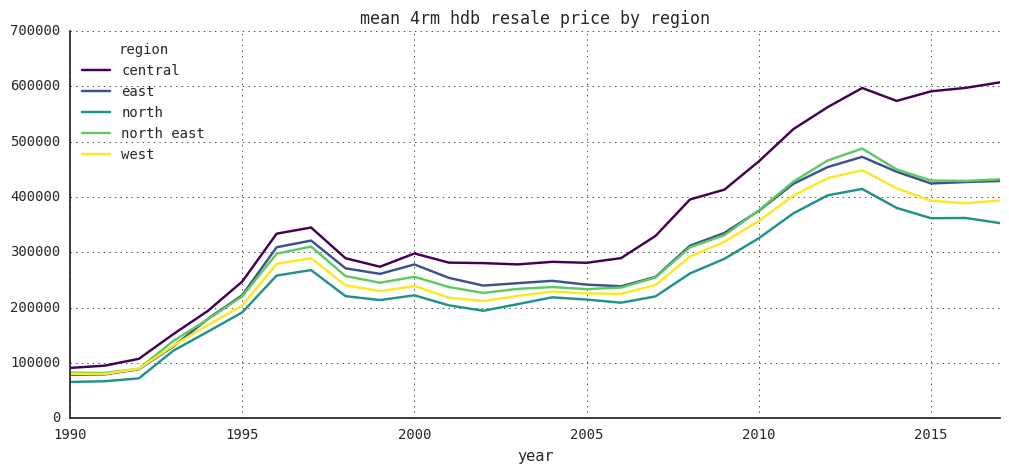

In [66]:
#mean 4 room hdb price by region
ax = (df.query('type == "4 room"')
      .pivot_table(values = 'resale_price', index = 'year', columns = 'region', aggfunc = np.mean)
      .plot(figsize = (12,5), kind = 'line', colormap = 'viridis', title = 'mean 4rm hdb resale price by region'))

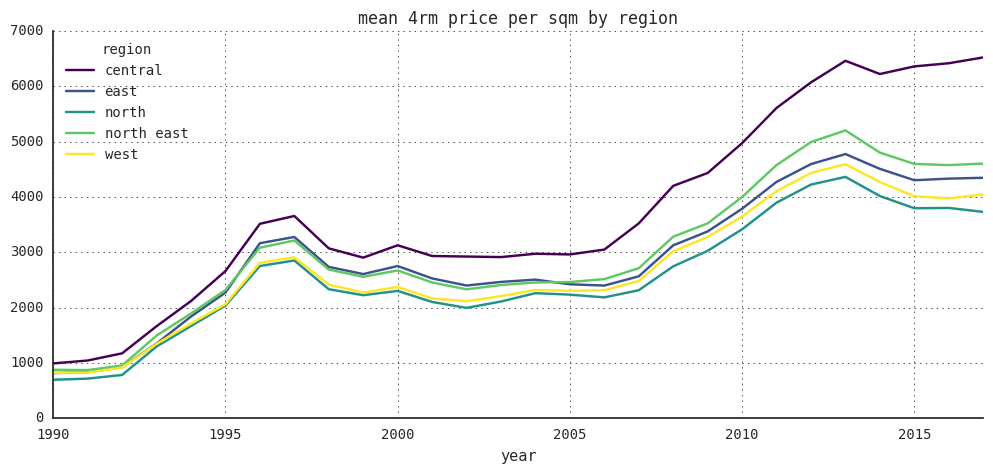

In [232]:
#mean 4 room hdb price by region
ax = (df.query('type == "4 room"')
      .pivot_table(values = 'price_sqm', index = 'year', columns = 'region', aggfunc = np.mean)
      .plot(figsize = (12,5), kind = 'line', colormap = 'viridis', title = 'mean 4rm price per sqm by region'))

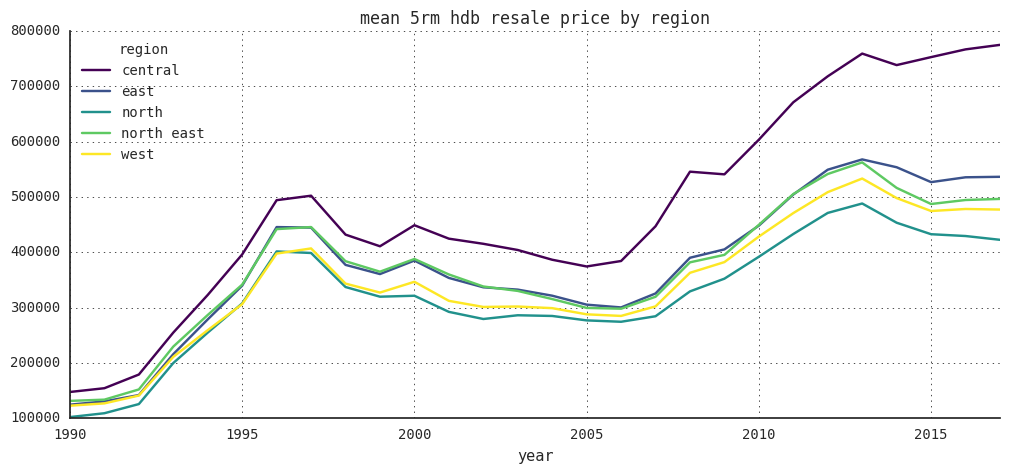

In [67]:
#mean 5 room hdb price by region
ax = (df.query('type == "5 room"')
      .pivot_table(values = 'resale_price', index = 'year', columns = 'region', aggfunc = np.mean)
      .plot(figsize = (12,5), kind = 'line', colormap = 'viridis', title = 'mean 5rm hdb resale price by region'))

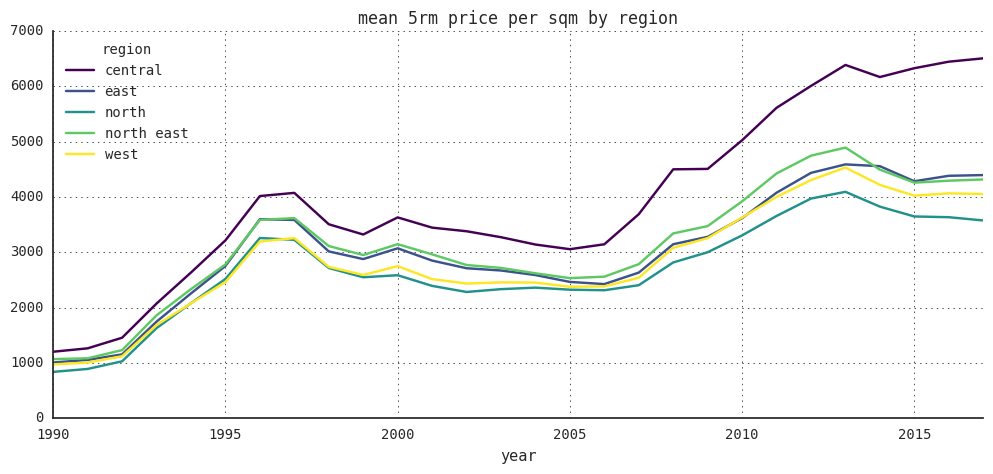

In [233]:
ax = (df.query('type == "5 room"')
      .pivot_table(values = 'price_sqm', index = 'year', columns = 'region', aggfunc = np.mean)
      .plot(figsize = (12,5), kind = 'line', colormap = 'viridis', title = 'mean 5rm price per sqm by region'))

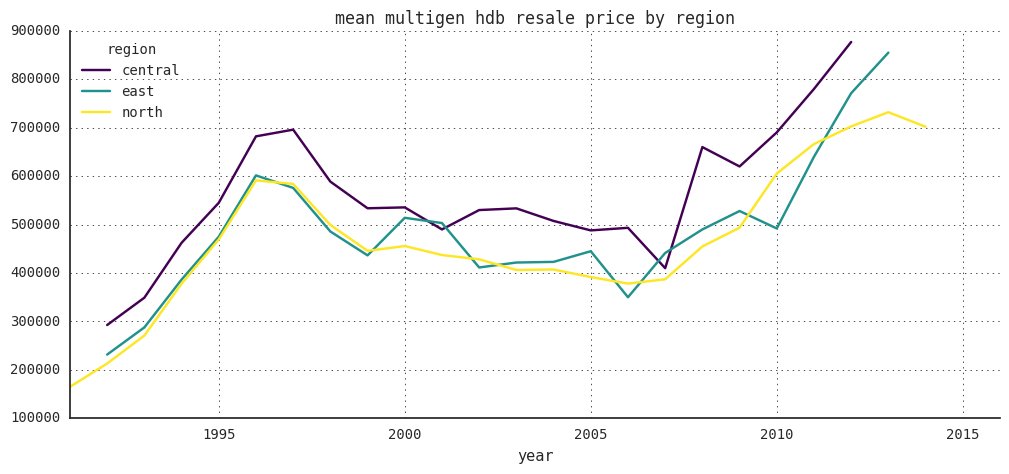

In [68]:
#mean multigen hdb price by region
ax = (df.query('type == "multi generation"')
      .pivot_table(values = 'resale_price', index = 'year', columns = 'region', aggfunc = np.mean)
      .plot(figsize = (12,5), kind = 'line', colormap = 'viridis', title = 'mean multigen hdb resale price by region'))

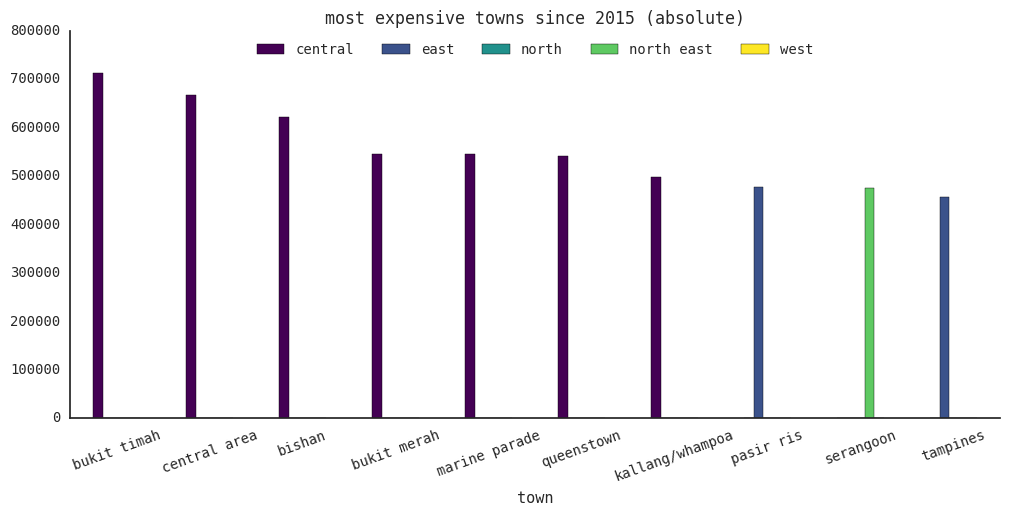

In [240]:
top_towns = (df.query('year >= 2015')
             .pivot_table(values = 'resale_price', index = 'town', columns = 'region', aggfunc = np.mean)
             .fillna(0)
             .assign(total = top_towns['central'] + top_towns['east'] + top_towns['north'] + top_towns['north east'] + top_towns['west'])
             .sort_values('total', ascending = False))

ax = (top_towns.iloc[:10, :5].plot(kind = 'bar', colormap = 'viridis', grid = False, title = 'most expensive towns since 2015 (absolute)'))
ax.legend(loc = 'upper center', ncol = 5)
for tick in ax.get_xticklabels():
    tick.set_rotation(20)

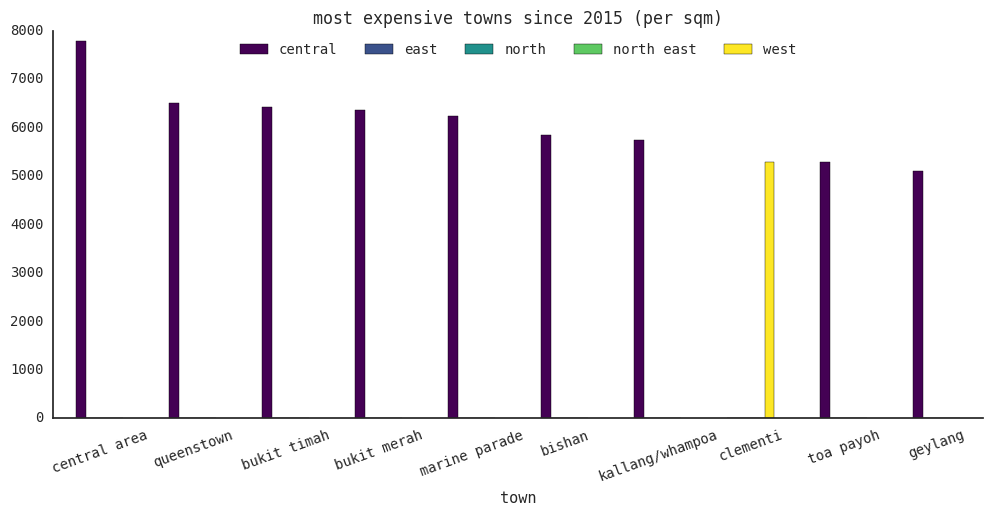

In [279]:
top_towns_sqm = (df.query('year >= 2015')
             .pivot_table(values = 'price_sqm', index = 'town', columns = 'region', aggfunc = np.mean)
             .fillna(0)
             .assign(total = top_towns_sqm['central'] + top_towns_sqm['east'] + top_towns_sqm['north'] + top_towns_sqm['north east'] + top_towns_sqm['west'])
             .sort_values('total', ascending = False))

ax = (top_towns_sqm.iloc[:10, :5].plot(kind = 'bar', colormap = 'viridis', grid = False, title = 'most expensive towns since 2015 (per sqm)' ))
ax.legend(loc = 'upper center', ncol = 5)
for tick in ax.get_xticklabels():
    tick.set_rotation(20)

In [248]:
df.head()

,date,town,type,block,street,storey,area,model,lease_start,resale_price,year,month,region,price_psm,price_sqm
0,1990-01-01,ang mo kio,1 room,309,ang mo kio ave 1,10 to 12,31.0,improved,1977,9000.0,1990,1,north east,290.322581,290.322581
1,1990-01-01,ang mo kio,1 room,309,ang mo kio ave 1,04 to 06,31.0,improved,1977,6000.0,1990,1,north east,193.548387,193.548387
2,1990-01-01,ang mo kio,1 room,309,ang mo kio ave 1,10 to 12,31.0,improved,1977,8000.0,1990,1,north east,258.064516,258.064516
3,1990-01-01,ang mo kio,1 room,309,ang mo kio ave 1,07 to 09,31.0,improved,1977,6000.0,1990,1,north east,193.548387,193.548387
4,1990-01-01,ang mo kio,3 room,216,ang mo kio ave 1,04 to 06,73.0,new generation,1976,47200.0,1990,1,north east,646.575342,646.575342


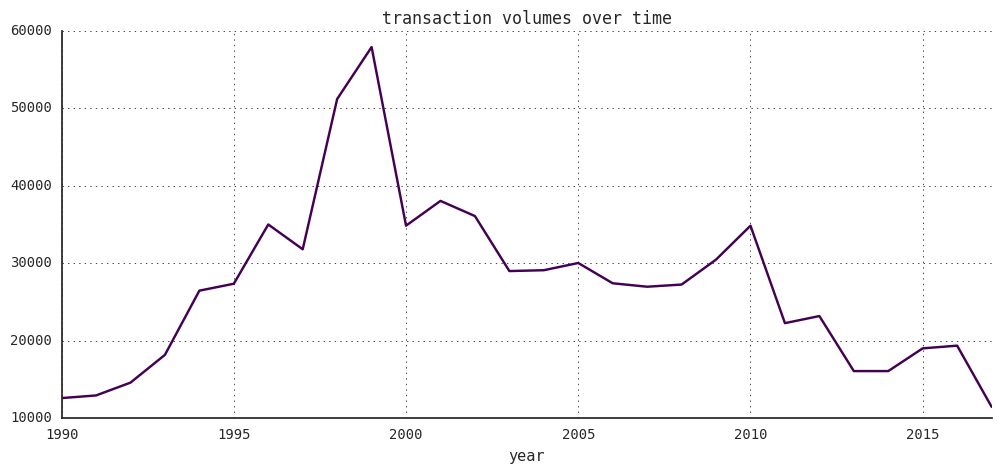

In [255]:
#transactions over time
volume = df.groupby('year')['type'].count()

ax = volume.plot(kind = 'line', colormap = 'viridis', title = 'transaction volumes over time')

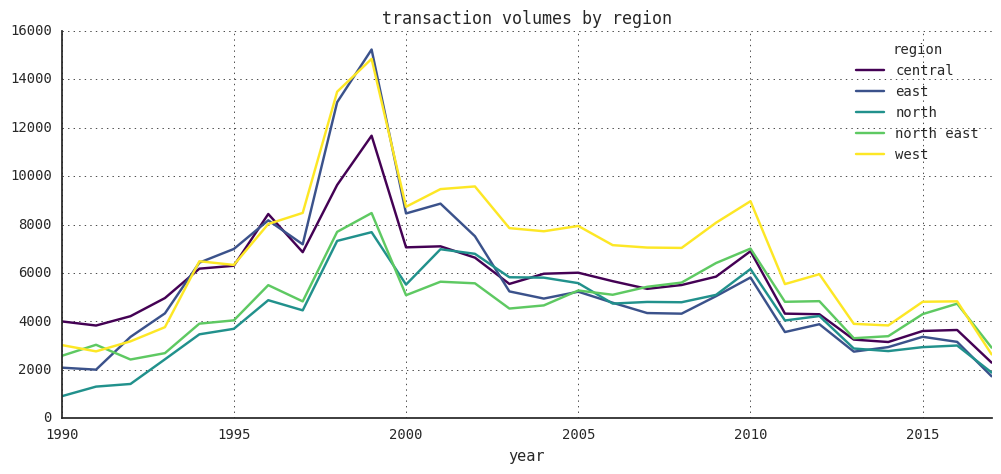

In [266]:
volume_region = df.groupby(['year', 'region'])['type'].count().unstack()

volume_region.plot(kind = 'line', colormap = 'viridis', title = 'transaction volumes by region')

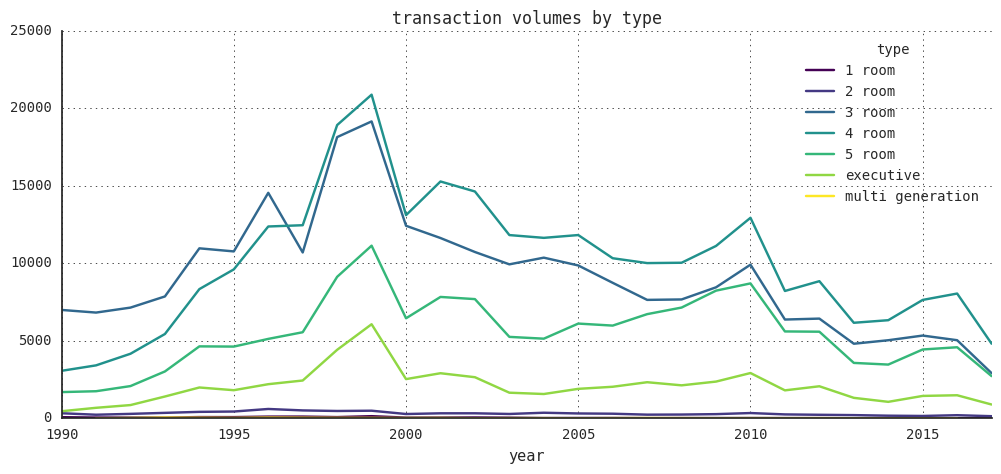

In [267]:
volume_type = df.groupby(['year', 'type'])['region'].count().unstack()
volume_type.plot(kind = 'line', colormap = 'viridis', title = 'transaction volumes by type')

In [269]:
df['lease_start'] = pd.to_numeric(df['lease_start'])
df['year'] = pd.to_numeric(df['year'])
df['lease_remaining'] = df['lease_start'] + 99 - df['year']

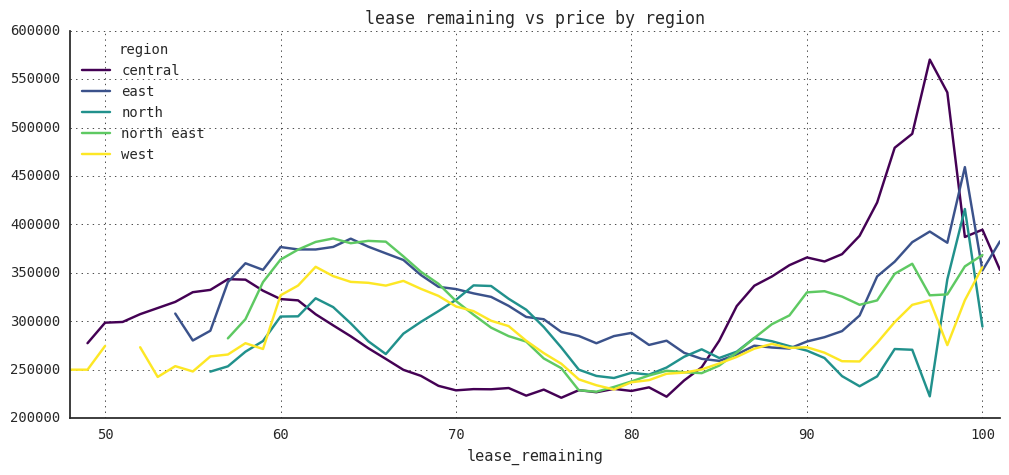

In [270]:
#lease remaining vs price
ax = (df.pivot_table(values = 'resale_price', index = 'lease_remaining', columns = 'region', aggfunc = np.mean)
      .plot(figsize = (12,5), kind = 'line', colormap = 'viridis', title = 'lease remaining vs price by region'))

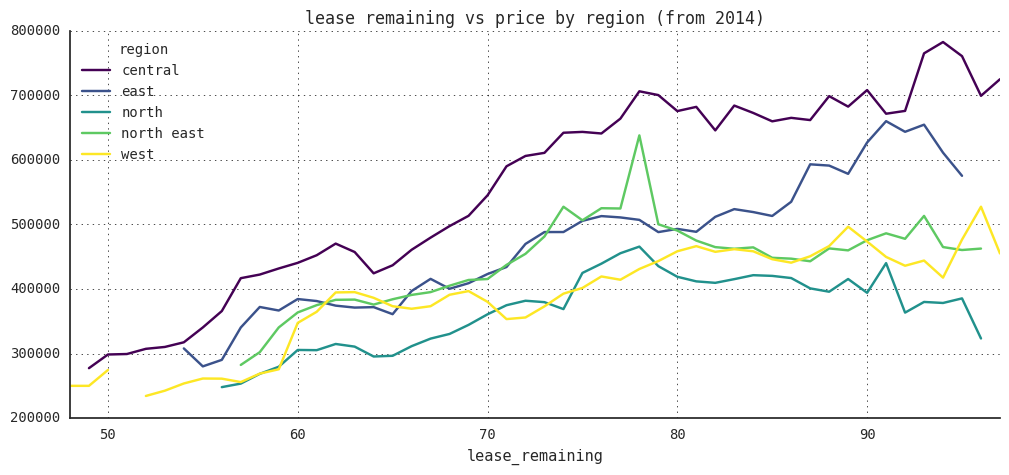

In [305]:
#lease remaining vs price since 2015
ax = (df.query('year >= 2014')
      .pivot_table(values = 'resale_price', index = 'lease_remaining', columns = 'region', aggfunc = np.mean)
      .plot(figsize = (12,5), kind = 'line', colormap = 'viridis', title = 'lease remaining vs price by region (from 2014)'))

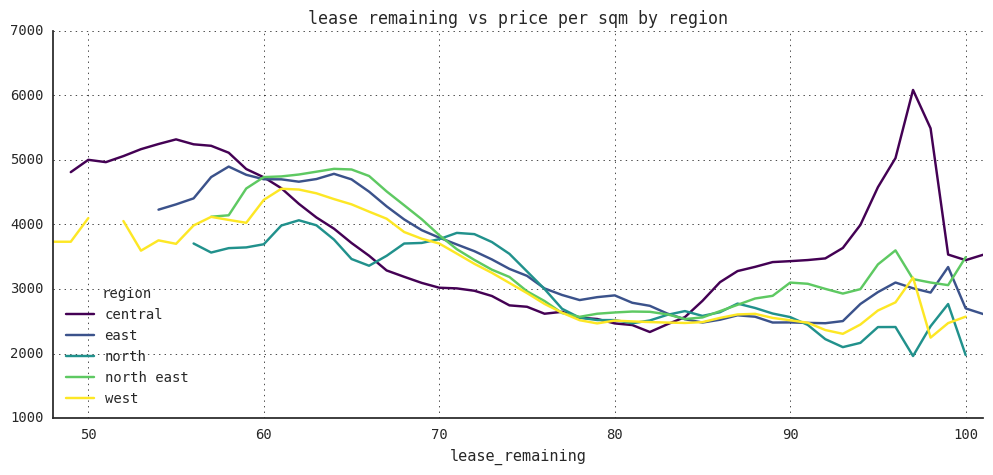

In [291]:
#lease remaining vs price per sqm
ax = (df.pivot_table(values = 'price_sqm', index = 'lease_remaining', columns = 'region', aggfunc = np.mean)
      .plot(figsize = (12,5), kind = 'line', colormap = 'viridis', title = 'lease remaining vs price per sqm by region'))

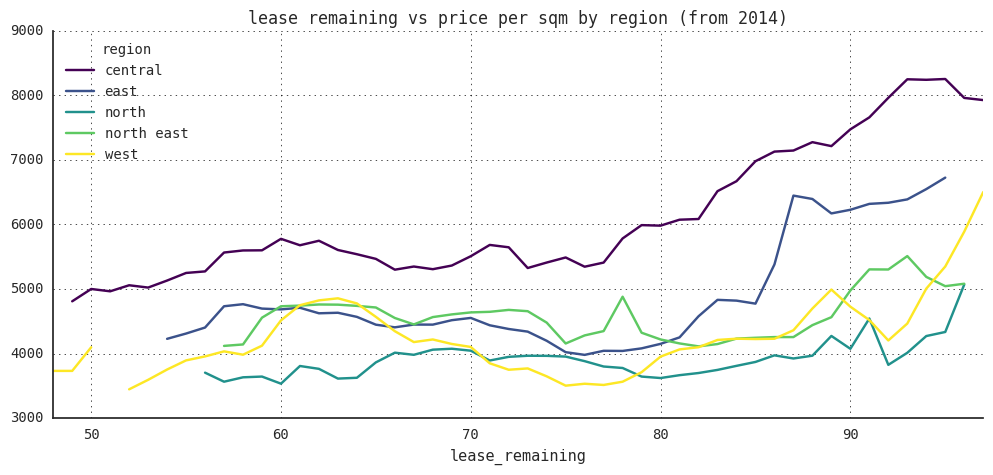

In [307]:
#lease remaining vs price per sqm
ax = (df.query('year >= 2014')
      .pivot_table(values = 'price_sqm', index = 'lease_remaining', columns = 'region', aggfunc = np.mean)
      .plot(figsize = (12,5), kind = 'line', colormap = 'viridis', title = 'lease remaining vs price per sqm by region (from 2014)'))